# Data Cleaning

Data source: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

Having obtained the raw dataset from the source, we first need to clean the data in order to use them effectively

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
sb.set()

In [2]:
accident_df = pd.read_csv('US_Accidents_March23_sampled_500k.csv')

In [3]:
accident_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [5]:
accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


## Filtering by state

With quite a handful amount of data (500k to be exact), our group decided to reduce our dataset to something a little bit more manageable. We decided to narrow down by location - the state with the most amount of accident

In [28]:
# find state with most accidents
print("Number of states:", len(accident_df['State'].unique()))
print(accident_df['State'].value_counts())

Number of states: 49
State
CA    113274
FL     56710
TX     37355
SC     24737
NY     22594
NC     21750
VA     19515
PA     19351
MN     12333
OR     11559
AZ     11150
GA     11079
IL     10904
TN     10850
MI     10518
LA      9651
MD      9128
NJ      9020
OH      7678
WA      7004
AL      6585
UT      6310
CO      5924
OK      5296
MO      5025
CT      4602
IN      4320
MA      3917
WI      2290
KY      2101
NE      1893
MT      1871
IA      1724
AR      1483
KS      1362
NV      1343
DC      1207
RI      1093
MS       977
DE       907
WV       851
ID       718
NM       636
NH       635
WY       254
ND       238
ME       202
VT        57
SD        19
Name: count, dtype: int64


C:\Users\fazli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


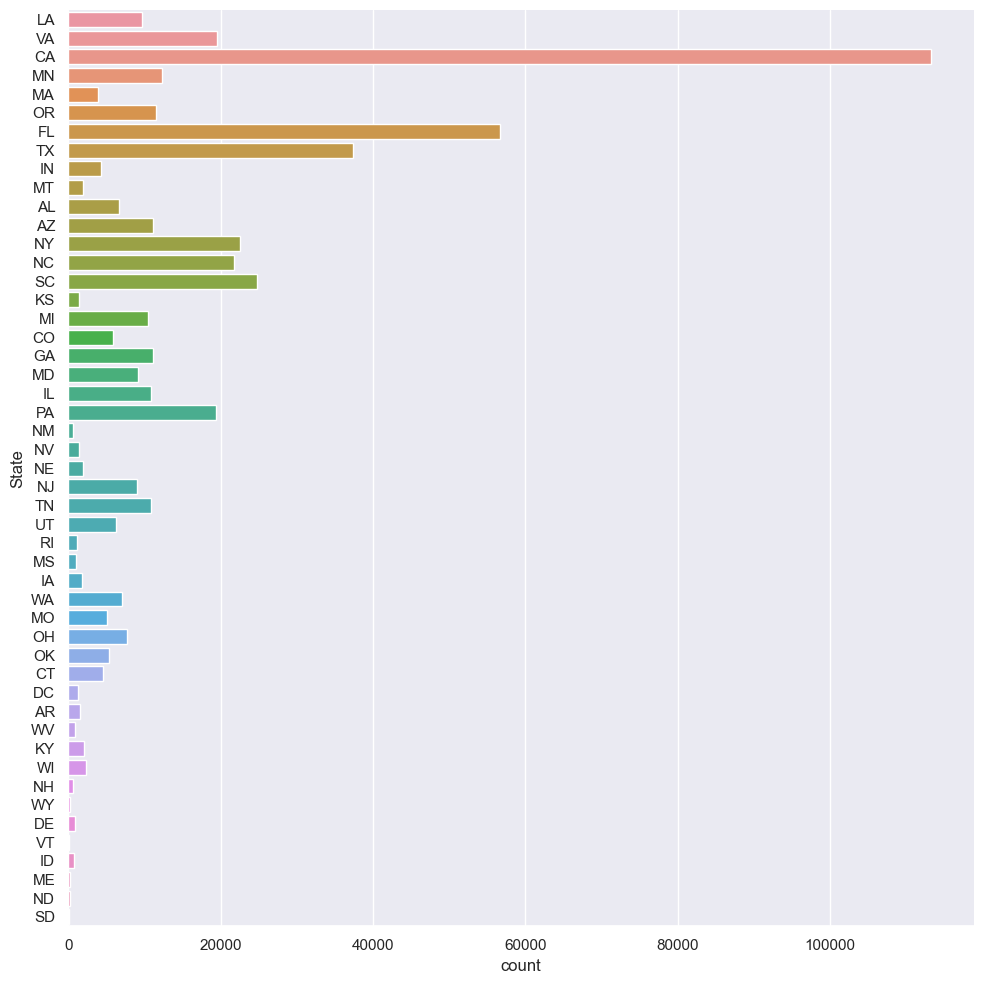

In [29]:
# plot graph
sb.catplot(y = 'State', data = accident_df, kind = 'count', height = 10)

From above, we can see that California `CA` has the most amount of accidents (113274). Thus, we can remove all the other rows that are not from `CA`

In [7]:
# keep rows from California state
cal_accident_df = accident_df[accident_df['State'] == 'CA']

## Removing unnecessary columns

After narrowing down by state, we now want to remove the columns that are redundant or not useful for our data analysis. Let's take a look at the columns that are provided

In [8]:
cal_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113274 entries, 2 to 499994
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     113274 non-null  object 
 1   Source                 113274 non-null  object 
 2   Severity               113274 non-null  int64  
 3   Start_Time             113274 non-null  object 
 4   End_Time               113274 non-null  object 
 5   Start_Lat              113274 non-null  float64
 6   Start_Lng              113274 non-null  float64
 7   End_Lat                71784 non-null   float64
 8   End_Lng                71784 non-null   float64
 9   Distance(mi)           113274 non-null  float64
 10  Description            113274 non-null  object 
 11  Street                 113113 non-null  object 
 12  City                   113274 non-null  object 
 13  County                 113274 non-null  object 
 14  State                  113274 non-null  o

From looking at the columns above, we can filter out the columns that we don't need

**Columns to remove:**  
`ID`, `Source`, `End_Lat`, `End_Lng`, `End_Time`, `Description`, `State`, `Country`, `Timezone`, `Airport_Code`, `Weather_Timestamp`

In [9]:
# remove cols that are not necessary to us
col_remove = ['ID', 'Source', 'End_Lat', 'End_Time', 'End_Lng', 'Description', 'State', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp']
cal_accident_df = cal_accident_df.drop(columns=col_remove, axis=1)

In [10]:
cal_accident_df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,Zipcode,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,2,2022-08-20 13:13:00.000000000,34.661189,-120.492822,0.022,Floradale Ave,Lompoc,Santa Barbara,93436,68.0,...,False,False,False,False,True,False,Day,Day,Day,Day
4,2,2020-12-04 01:46:00,35.395484,-118.985176,0.046,River Blvd,Bakersfield,Kern,93305-2649,42.0,...,False,False,False,False,False,False,Night,Night,Night,Night
13,2,2022-02-18 16:53:00,32.771645,-117.161407,2.845,Friars Rd,San Diego,San Diego,92108,63.0,...,False,False,False,False,False,False,Day,Day,Day,Day
21,2,2020-06-15 08:17:29,34.243271,-118.424461,0.000,Bartee Ave,Arleta,Los Angeles,91331-4606,64.0,...,False,False,True,False,False,False,Day,Day,Day,Day
27,2,2022-03-22 07:22:30.000000000,33.120965,-117.321490,1.626,I-5 S,Carlsbad,San Diego,92011,55.0,...,False,False,False,False,False,False,Day,Day,Day,Day


## Conversion of units

Since the raw data is from the USA where they use empirical units, we also need to convert these data back into metric units. We can do this by adding a new column that contains the converted metric units and remove the old column conatining the empirical units

In [11]:
# change imperical unit to metric unit and place them in new col

# mi -> km: Distance, Visibility
# 1 mi = 1.6 km
cal_accident_df['Distance'] = cal_accident_df['Distance(mi)'] * 1.6
cal_accident_df['Visibility'] = cal_accident_df['Visibility(mi)'] * 1.6

# mph -> kph: Wind_Speed
cal_accident_df['Wind_Speed'] = cal_accident_df['Wind_Speed(mph)'] * 1.6

# F -> C: Temperature, Wind_Chill
# C = (F - 32) * 5/9
def farenheit_to_celcius(f):
    return (f - 32) * 5/9
cal_accident_df['Temperature'] = cal_accident_df['Temperature(F)'].apply(farenheit_to_celcius)
cal_accident_df['Wind_Chill'] = cal_accident_df['Wind_Chill(F)'].apply(farenheit_to_celcius)

# in -> mm: Pressure, Precipitation
# 1 in = 25.4 mm
cal_accident_df['Precipitation'] = cal_accident_df['Precipitation(in)'] * 25.4
cal_accident_df['Pressure'] = cal_accident_df['Pressure(in)'] * 25.4

In [12]:
# remove the cols with the imperial unit
remove_cols = ['Distance(mi)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Temperature(F)', 'Wind_Chill(F)', 'Precipitation(in)', 'Pressure(in)']
cal_accident_df = cal_accident_df.drop(columns=remove_cols, axis=1)

In [13]:
cal_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113274 entries, 2 to 499994
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               113274 non-null  int64  
 1   Start_Time             113274 non-null  object 
 2   Start_Lat              113274 non-null  float64
 3   Start_Lng              113274 non-null  float64
 4   Street                 113113 non-null  object 
 5   City                   113274 non-null  object 
 6   County                 113274 non-null  object 
 7   Zipcode                113236 non-null  object 
 8   Humidity(%)            110220 non-null  float64
 9   Wind_Direction         110363 non-null  object 
 10  Weather_Condition      110753 non-null  object 
 11  Amenity                113274 non-null  bool   
 12  Bump                   113274 non-null  bool   
 13  Crossing               113274 non-null  bool   
 14  Give_Way               113274 non-null  b

## Date conversion

The `Start_Time` col consists of the date and start time of accident. However, it's datatype is listed as boolean. Let's convert it as a datetime object instead. We also need to take note that the format of the col is not uniform, with some time having the millisecond and some don't   
e.g `2022-08-20 13:13:00.000000000` and `2020-12-04 01:46:00`

In [16]:
cal_accident_df['Start_Time'] = pd.to_datetime(cal_accident_df['Start_Time'], format = 'mixed')

## Type of roads

Given how huge America is, there are many different types of road that we can find, from interstate, freeway, highway, to street, avenue, boulevard and many more. To further add to the confusion, the roads are also divided into federal, state, cities, local and many more. In order to simplfy this, we are just going to use the classify them based on the given address suffix or prefix.

We can obtain the type of road from the street address `Street` and applying some basic regex pattern

In [17]:
def classify_road_type(address):
    road_type = None
    # regex to match road types
    patterns = {
        'Street': r'\b(?:street|st)\b',
        'Avenue': r'\b(?:avenue|ave)\b',
        'Road': r'\broad|rd\b',
        'Drive': r'\bdrive|dr\b',
        'Way': r'\bway|wy\b',
        'Boulevard': r'\bboulevard|blvd\b',
        'Broadway': r'\bbroadway|bdwy\b',
        'Bridge' : r'\bbridge|brdg\b',
        'Lane': r'\blane|ln\b',
        'Parkway': r'\bparkway|pkwy\b',
        'Court': r'\bcourt|ct\b',
        'Circle': r'\bcircle|cir\b',
        'Highway': r'\bhighway|hwy|CA-|SR-|state route\b',  # add 'CA-' pattern
        'Interstate': r'\binterstate|I-|US-\d+\b',
        'Freeway': r'\bfreeway|fwy\b'
    }
    for key, pattern in patterns.items():
        if re.search(pattern, address, re.IGNORECASE):
            road_type = key
            break
    return road_type

In [18]:
# apply above function to data
cal_accident_df['Street'] = cal_accident_df['Street'].astype(str)
cal_accident_df['Road_Type'] = cal_accident_df['Street'].apply(classify_road_type)

In [19]:
# check null values
print(cal_accident_df['Road_Type'].isna().sum())
df = cal_accident_df.loc[cal_accident_df['Road_Type'].isna()]
print(df[['Street', 'Road_Type']])

2223
                                    Street Road_Type
621                          Avenida Vejar      None
888     Foothill Transportation Corridor S      None
921                       El Camino Real S      None
1465                                   nan      None
1746                       Linea del Cielo      None
...                                    ...       ...
499196                                  4A      None
499228                          Via Marina      None
499594                    El Camino Real N      None
499744                                 nan      None
499835                    El Camino Real S      None

[2223 rows x 2 columns]


From checking the null values, it seems that most of the street address have been classified. The few exceptions as seen above are those without an address suffix and prefix or street is a null value

## Finished cleaning

Now that we are done with cleaning the data, we can now save it into a new csv file and work on data exploration and analysis

In [20]:
# summary of data
cal_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113274 entries, 2 to 499994
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               113274 non-null  int64         
 1   Start_Time             113274 non-null  datetime64[ns]
 2   Start_Lat              113274 non-null  float64       
 3   Start_Lng              113274 non-null  float64       
 4   Street                 113274 non-null  object        
 5   City                   113274 non-null  object        
 6   County                 113274 non-null  object        
 7   Zipcode                113236 non-null  object        
 8   Humidity(%)            110220 non-null  float64       
 9   Wind_Direction         110363 non-null  object        
 10  Weather_Condition      110753 non-null  object        
 11  Amenity                113274 non-null  bool          
 12  Bump                   113274 non-null  bool     

In [21]:
# save into new file
cal_accident_df.to_csv('california_accident_data.csv')

In [22]:
cal_accident_df.head(10)

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,Zipcode,Humidity(%),Wind_Direction,...,Nautical_Twilight,Astronomical_Twilight,Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure,Road_Type
2,2,2022-08-20 13:13:00,34.661189,-120.492822,Floradale Ave,Lompoc,Santa Barbara,93436,73.0,W,...,Day,Day,0.0352,16.0,20.80,20.000000,20.000000,0.0,756.666,Avenue
4,2,2020-12-04 01:46:00,35.395484,-118.985176,River Blvd,Bakersfield,Kern,93305-2649,34.0,CALM,...,Night,Night,0.0736,16.0,0.00,5.555556,5.555556,0.0,756.158,Boulevard
13,2,2022-02-18 16:53:00,32.771645,-117.161407,Friars Rd,San Diego,San Diego,92108,40.0,NW,...,Day,Day,4.5520,16.0,22.40,17.222222,17.222222,0.0,754.126,Road
21,2,2020-06-15 08:17:29,34.243271,-118.424461,Bartee Ave,Arleta,Los Angeles,91331-4606,64.0,ESE,...,Day,Day,0.0000,16.0,8.00,17.777778,17.777778,NaN,734.568,Avenue
27,2,2022-03-22 07:22:30,33.120965,-117.321490,I-5 S,Carlsbad,San Diego,92011,72.0,ENE,...,Day,Day,2.6016,16.0,9.60,12.777778,12.777778,0.0,753.872,Interstate
31,2,2016-09-13 22:15:22,38.654133,-121.382942,Watt Ave,North Highlands,Sacramento,95660-5110,59.0,SSW,...,Night,Night,0.0000,16.0,9.28,17.000000,NaN,NaN,761.746,Avenue
33,2,2021-01-05 01:56:00,38.087915,-122.231751,I-80 E,Vallejo,Solano,94591,93.0,CALM,...,Night,Night,0.2240,0.8,0.00,2.777778,2.777778,0.0,767.842,Interstate
39,3,2020-03-26 16:25:54,34.057327,-118.165031,I-710 N,Monterey Park,Los Angeles,91754,35.0,W,...,Day,Day,0.0000,16.0,14.40,16.111111,16.111111,0.0,755.650,Interstate
43,2,2022-12-30 16:40:00,33.778744,-117.876630,I-5 S,Santa Ana,Orange,92706,80.0,SSW,...,Day,Day,5.5472,16.0,11.20,15.555556,15.555556,0.0,762.508,Interstate
45,2,2022-03-07 17:54:31,33.661930,-117.875450,Bristol St S,Newport Beach,Orange,92660,33.0,W,...,Day,Day,0.0000,16.0,8.00,18.333333,18.333333,0.0,764.032,Street
